<a href="https://colab.research.google.com/github/tamzid1984/DeepLearning/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import spacy
import numpy as np
import pandas  as pd

In [7]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [8]:
nlp_parse = spacy.load('en_core_web_sm')

In [9]:
sentence = "Natural Language Processing is most important terms for Medical or Agriculture field"

In [10]:
words = sentence.split()

In [11]:
print(words)

['Natural', 'Language', 'Processing', 'is', 'most', 'important', 'terms', 'for', 'Medical', 'or', 'Agriculture', 'field']


In [12]:
pos_tag = nltk.pos_tag(sentence.split())

In [13]:
dataframe = pd.DataFrame(pos_tag).T
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11
0,Natural,Language,Processing,is,most,important,terms,for,Medical,or,Agriculture,field
1,JJ,NNP,NNP,VBZ,RBS,JJ,NNS,IN,NNP,CC,NNP,NN


In [14]:
spacy_postag = [(word, word.tag_, word.pos_) for word  in nlp_parse(sentence)]

In [15]:
pd.DataFrame(spacy_postag).T

,0,1,2,3,4,5,6,7,8,9,10,11
0,Natural,Language,Processing,is,most,important,terms,for,Medical,or,Agriculture,field
1,NNP,NNP,NNP,VBZ,RBS,JJ,NNS,IN,NNP,CC,NNP,NN
2,PROPN,PROPN,PROPN,AUX,ADV,ADJ,NOUN,ADP,PROPN,CCONJ,PROPN,NOUN


In [16]:
spacy_postag

[(Natural, 'NNP', 'PROPN'),
 (Language, 'NNP', 'PROPN'),
 (Processing, 'NNP', 'PROPN'),
 (is, 'VBZ', 'AUX'),
 (most, 'RBS', 'ADV'),
 (important, 'JJ', 'ADJ'),
 (terms, 'NNS', 'NOUN'),
 (for, 'IN', 'ADP'),
 (Medical, 'NNP', 'PROPN'),
 (or, 'CC', 'CCONJ'),
 (Agriculture, 'NNP', 'PROPN'),
 (field, 'NN', 'NOUN')]

In [17]:
grammer = """ PROPN : {<NNP.*>}
                AUX: {<VBZ.*>}
                ADV: {<RBS.*>}
                NOUN:{<NNS.*>}
                ADP: {<IN.*>}
                ADJ : {<JJ.*>}
                CCONJ: {<CC.*>+}
"""

In [18]:
pos_tag_sent = nltk.pos_tag(sentence.split())

In [19]:
rp = nltk.RegexpParser(grammer)

In [20]:
print(rp)

chunk.RegexpParser with 7 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NNP.*>'>
RegexpChunkParser with 1 rules:
       <ChunkRule: '<VBZ.*>'>
RegexpChunkParser with 1 rules:
       <ChunkRule: '<RBS.*>'>
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NNS.*>'>
RegexpChunkParser with 1 rules:
       <ChunkRule: '<IN.*>'>
RegexpChunkParser with 1 rules:
       <ChunkRule: '<JJ.*>'>
RegexpChunkParser with 1 rules:
       <ChunkRule: '<CC.*>+'>


In [21]:
new_parse = rp.parse(pos_tag_sent)

In [22]:
print(new_parse)

(S
  (ADJ Natural/JJ)
  (PROPN Language/NNP)
  (PROPN Processing/NNP)
  (AUX is/VBZ)
  (ADV most/RBS)
  (ADJ important/JJ)
  (NOUN terms/NNS)
  (ADP for/IN)
  (PROPN Medical/NNP)
  (CCONJ or/CC)
  (PROPN Agriculture/NNP)
  field/NN)


In [24]:
! pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 2.7 MB/s 


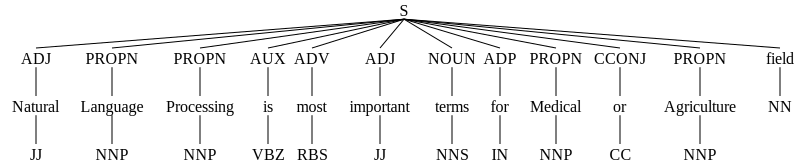

In [25]:
new_parse

In [26]:
from spacy import displacy

displacy.render(nlp_parse(sentence),
                jupyter=True,
                
                options={'distance': 90, 
                         'arrow_stroke':1.5,
                         'arrow_width':15})

In [27]:
from nltk.parse.stanford import StanfordParser

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
scp = StanfordParser(path_to_jar = "drive/MyDrive/stanford-parser-full-2020-11-17/stanford-parser.jar", 
                    path_to_models_jar = "drive/MyDrive/stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  


In [31]:
result = list(scp.raw_parse(sentence))

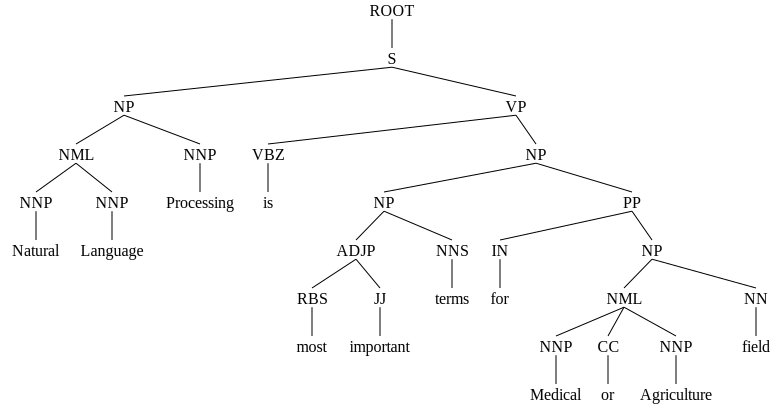

In [32]:
result[0]

In [35]:
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [36]:
print("Total Categories in Sentence: ", brown.categories())

Total Categories in Sentence:  ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [37]:
print("Total Categories in Sentence: ", len(brown.categories()))

Total Categories in Sentence:  15


In [38]:
sen = brown.sents(categories = 'belles_lettres')

sen = [' '.join(sen_token) for sen_token in sen]

In [39]:
sen[0:2]

['Northern liberals are the chief supporters of civil rights and of integration .',
 'They have also led the nation in the direction of a welfare state .']